[참고 link](https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer/41712013#41712013)


(160, 320, 3)

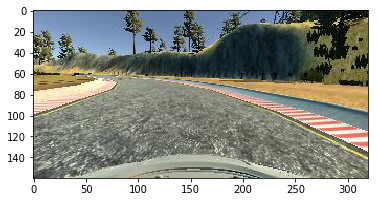

In [35]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


image = cv2.imread('data\IMG\center_2018_01_02_21_25_23_315.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
image.shape

In [2]:
A=image.reshape((1, 160, 320, 3))

In [3]:
A.shape

(1, 160, 320, 3)

In [4]:
from keras import backend as K

def get_layer_outputs():
    test_image = cv2.imread('data\IMG\center_2018_01_02_21_25_23_315.jpg')

    test_image=test_image.reshape((1, 160, 320, 3))

    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(layer_number):    
    layer_outputs = get_layer_outputs()

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]


    for img in L:
        plt.figure()
        plt.imshow(img, interpolation='nearest')

Using TensorFlow backend.


In [5]:
from IPython.display import display, Image, SVG
from keras.models import load_model
import numpy as np

def loadModel(modelPath):
    """
    Loads the model `modelPath`.
    """
    model = load_model(modelPath)
    return model

In [6]:
model=loadModel('model.h5')

(160, 320, 3)
-------------------
(90, 320, 3)
-------------------
(43, 158, 24)
-------------------
(20, 77, 36)
-------------------
(8, 37, 48)
-------------------
(6, 35, 64)
-------------------
(4, 33, 64)
-------------------
(4, 33, 64)
-------------------
(8448,)
-------------------
(100,)
-------------------
(50,)
-------------------
(10,)
-------------------
(10,)
-------------------
(1,)
-------------------


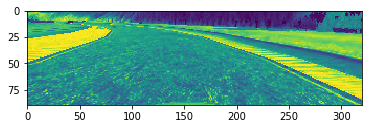

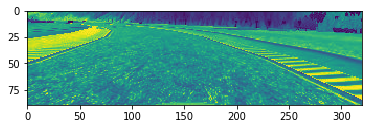

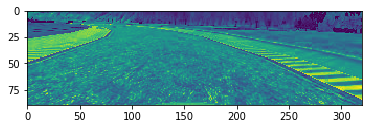

In [48]:
layer_number=1

layer_outputs = get_layer_outputs()

x_max = layer_outputs[layer_number].shape[0]
y_max = layer_outputs[layer_number].shape[1]
n     = layer_outputs[layer_number].shape[2]

L = []
for i in range(n):
    L.append(np.zeros((x_max, y_max)))

for i in range(n):
    for x in range(x_max):
        for y in range(y_max):
            L[i][x][y] = layer_outputs[layer_number][x][y][i]


for img in L:
    plt.figure()
    plt.imshow(img, interpolation='nearest')
plt.savefig('./examples/crop_results.png')


In [44]:
loadModel('model.h5').summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 33, 64)         36928     
__________

In [45]:
import pickle
with open('results.pickle', 'rb') as handle:
    results = pickle.load(handle)

In [46]:
loss = results['loss']
valid_loss = results['val_loss']

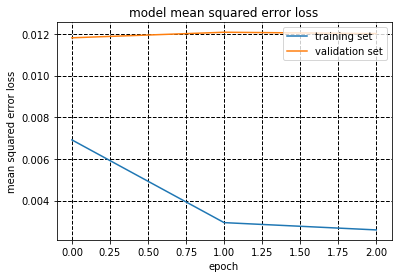

In [47]:
import matplotlib.pyplot as plt
### plot the training and validation loss for each epoch
plt.plot(loss)
plt.plot(valid_loss)
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.savefig('./examples/results.png')
plt.show()